# Lab CudaVision - Lab Project 
Learning Vision Systems on Graphics Cards (MA-INF 4308)

Salih MARANGOZ (s6samara)  
Elif Cansu YILDIZ (s6efyild)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datasets</a></span><ul class="toc-item"><li><span><a href="#Transforms" data-toc-modified-id="Transforms-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transforms</a></span></li><li><span><a href="#Analyze-Datasets" data-toc-modified-id="Analyze-Datasets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyze Datasets</a></span></li><li><span><a href="#Driving-Dataset" data-toc-modified-id="Driving-Dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Driving Dataset</a></span></li><li><span><a href="#Monkaa-Dataset" data-toc-modified-id="Monkaa-Dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Monkaa Dataset</a></span></li><li><span><a href="#Flyingthings3d-Dataset" data-toc-modified-id="Flyingthings3d-Dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Flyingthings3d Dataset</a></span></li><li><span><a href="#Kitti-Dataset" data-toc-modified-id="Kitti-Dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Kitti Dataset</a></span></li><li><span><a href="#Split/Concat-Datasets" data-toc-modified-id="Split/Concat-Datasets-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Split/Concat Datasets</a></span></li></ul></li><li><span><a href="#Dataloader" data-toc-modified-id="Dataloader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataloader</a></span></li><li><span><a href="#Training-Device" data-toc-modified-id="Training-Device-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training Device</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Experiments</a></span><ul class="toc-item"><li><span><a href="#Code-Examples" data-toc-modified-id="Code-Examples-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Code Examples</a></span></li></ul></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outputs</a></span><ul class="toc-item"><li><span><a href="#Full-PSMNet-(finetuned-with-Scheduler)-Outputs" data-toc-modified-id="Full-PSMNet-(finetuned-with-Scheduler)-Outputs-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Full-PSMNet (finetuned with Scheduler) Outputs</a></span></li><li><span><a href="#GCNet-Outputs" data-toc-modified-id="GCNet-Outputs-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>GCNet Outputs</a></span></li><li><span><a href="#Compare-Full-PSMNet-&amp;-GCNet" data-toc-modified-id="Compare-Full-PSMNet-&amp;-GCNet-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Compare Full-PSMNet &amp; GCNet</a></span></li><li><span><a href="#Compare-Scheduler-Effect-of-Full-PSMNet" data-toc-modified-id="Compare-Scheduler-Effect-of-Full-PSMNet-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Compare Scheduler Effect of Full-PSMNet</a></span></li></ul></li><li><span><a href="#Training,-Validation,-Test-Statistics" data-toc-modified-id="Training,-Validation,-Test-Statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training, Validation, Test Statistics</a></span><ul class="toc-item"><li><span><a href="#(BEST)-Full-PSMNet-finetuned-with-Scheduler" data-toc-modified-id="(BEST)-Full-PSMNet-finetuned-with-Scheduler-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>(BEST) Full-PSMNet finetuned with Scheduler</a></span></li><li><span><a href="#Full-PSMNet-finetuned-without-Scheduler" data-toc-modified-id="Full-PSMNet-finetuned-without-Scheduler-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Full-PSMNet finetuned without Scheduler</a></span></li><li><span><a href="#GCNet" data-toc-modified-id="GCNet-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>GCNet</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# For non-deterministic inference
%env CUBLAS_WORKSPACE_CONFIG=4096:8

env: CUBLAS_WORKSPACE_CONFIG=4096:8


## Import Modules

In [2]:
%load_ext autoreload
%autoreload 2

# Download IO Routines
#!wget "https://lmb.informatik.uni-freiburg.de/resources/datasets/IO.py" -nv -O io_routines.py

import os
import sys
from PIL import Image
import numpy as np
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from models.psmnet import PSMNet, HarderDisparityRegression
from models.gcnet import GCnet
from models.psmnet_basic import PSMNet as PSMNet_basic

import dataset_utilities as d_utils
import training_utilities as t_utils

In [3]:
print("Module versions:")
print('\n'.join(f'{"> " + m.__name__}: {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))
plt.style.use('seaborn')

Module versions:
> PIL.Image: 8.3.1
> numpy: 1.20.3
> torch: 1.10.0.dev20210814
> torchvision: 0.11.0.dev20210814


## Datasets

Extracting all dataset may use more than 100GB of space. This graph may help you to only extract which are needed. For example, we didn't use `35mm_focallength` data for the driving dataset. Modify `DATASET_ROOT` if your dataset folder is on another location.

```
├── labvision_project_folder
│   └── ...
├── dataset
    ├── driving
    │   ├── disparity
    │   │   └── 15mm_focallength
    │   └── frames_cleanpass_webp
    │   │   └── 15mm_focallength
    ├── flyingthings3d
    │   ├── disparity
    │   │   ├── TEST
    │   │   └── TRAIN
    │   └── frames_cleanpass_webp
    │   │   ├── TEST
    │   │   └── TRAIN
    ├── kitti
    │   └── training
    │       ├── image_2
    │       ├── image_3
    │       └── disp_occ_0
    └── monkaa
        ├── disparity
        │   ├── a_rain_of_stones_x2
        │   └── ....
        └── frames_cleanpass_webp
            ├── a_rain_of_stones_x2
            └── ....
```

In [4]:
DATASET_ROOT = "../../dataset"
# DATASET_ROOT = "../dataset"
driving_path = os.path.join(DATASET_ROOT, "driving")
monkaa_path = os.path.join(DATASET_ROOT, "monkaa")
flyingthings3d_path = os.path.join(DATASET_ROOT, "flyingthings3d")
kitti_path = os.path.join(DATASET_ROOT, "kitti")

### Transforms

We implemented `*-Multi` versions of some transforms which can process left image, right image and disparity map inputs. In these classes, while cropping operations done on all images, jittering and normalization only done on RGB images. We also added `SanitizeImageSizesMulti` for cropping data especially for KITTI dataset. This transform crops image and disparity data from left and right to match with target width, and only from top to match with target height (since KITTI has no disparity values on the top section of images).

In [5]:
pretrain_transforms = transforms.Compose([
    d_utils.ToTensorMulti(),
    d_utils.RandomCropMulti((256,512)),
    d_utils.NormalizeMulti(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

finetune_transforms = transforms.Compose([
    d_utils.ToTensorMulti(),
    d_utils.RandomCropMulti((256,512)),
    d_utils.ColorJitterMulti(brightness=0.3, hue=.05),
    d_utils.NormalizeMulti(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

eval_transforms = transforms.Compose([
    d_utils.ToTensorMulti(),
    d_utils.SanitizeImageSizesMulti(),
    d_utils.NormalizeMulti(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

### Analyze Datasets

We analyzed histogram of disparity values and coverage for the specific maximum disparity parameter. We found `192` would be a good maximum disparity parameter.

For Kitti Dataset:
Specific disparity values and dataset coverage:
> Disparity: 32 Coverage: 0.48578035014271426
> Disparity: 64 Coverage: 0.954859109614209
> Disparity: 96 Coverage: 0.9960861242061013
> Disparity: 128 Coverage: 0.9999173883665405
> Disparity: 160 Coverage: 0.9999988571513159
> Disparity: 192 Coverage: 0.999999945578634
> Disparity: 256 Coverage: 1.0

[!]Important Note: zero values hold 0.802661162455582 of the total data and excluded from the calculations.


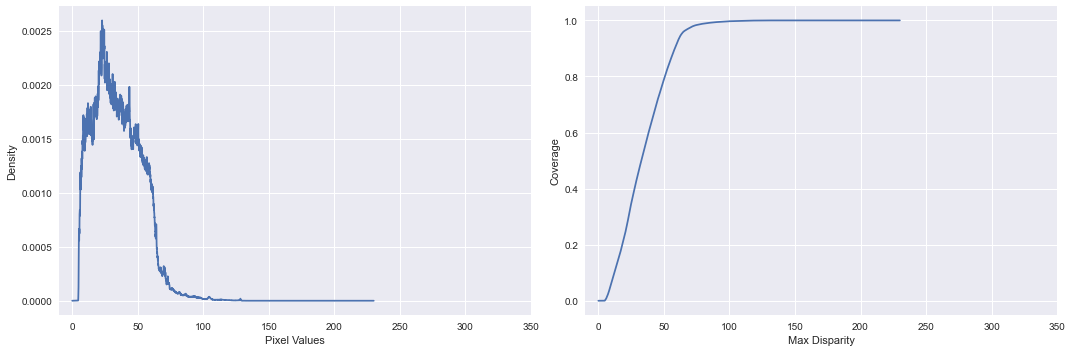

In [6]:
print("For Kitti Dataset:")
_=d_utils.analyze_dataset_disparity_coverage(plt.subplots(1,2, figsize=(15,5)),
                                             compute_zeros_seperately=True,
                                             use_file="dataset_stats/kitti_analyze_precalculated.npy")

For Scene Flow Datasets:
Specific disparity values and dataset coverage:
> Disparity: 32 Coverage: 0.47206765130284195
> Disparity: 64 Coverage: 0.7837547417732709
> Disparity: 96 Coverage: 0.8957416372542302
> Disparity: 128 Coverage: 0.9431340380772365
> Disparity: 160 Coverage: 0.9623832976707801
> Disparity: 192 Coverage: 0.9736206732269759
> Disparity: 256 Coverage: 0.9873596971759059


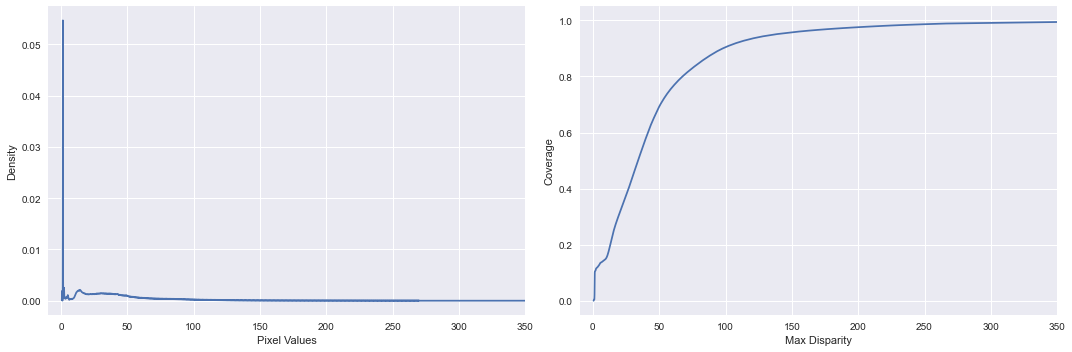

In [7]:
print("For Scene Flow Datasets:")
_=d_utils.analyze_dataset_disparity_coverage(plt.subplots(1,2, figsize=(15,5)),
                                             use_file="dataset_stats/sceneflow_analyze_precalculated.npy")

### Driving Dataset

Size of the Driving Dataset: 1600
Left/Right image shapes: torch.Size([3, 256, 512])
Disparity shape: torch.Size([1, 256, 512])



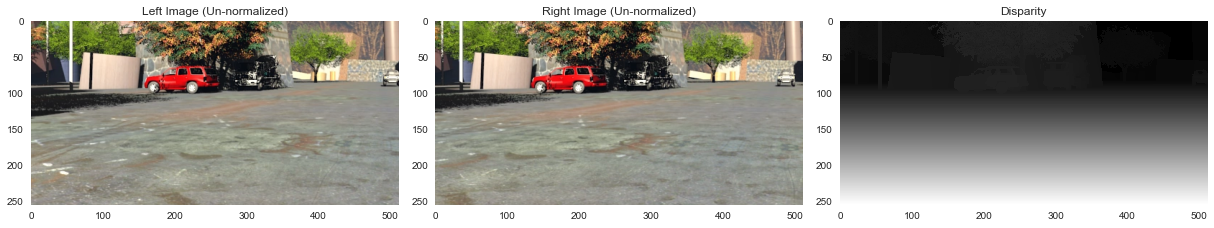

In [8]:
driving_dataset = d_utils.DrivingDataset(driving_path, transforms=pretrain_transforms)
_ = d_utils.imshow_samples_and_print_information(driving_dataset, unnormalize=True)

### Monkaa Dataset

Size of the Monkaa Dataset: 8664
Left/Right image shapes: torch.Size([3, 256, 512])
Disparity shape: torch.Size([1, 256, 512])



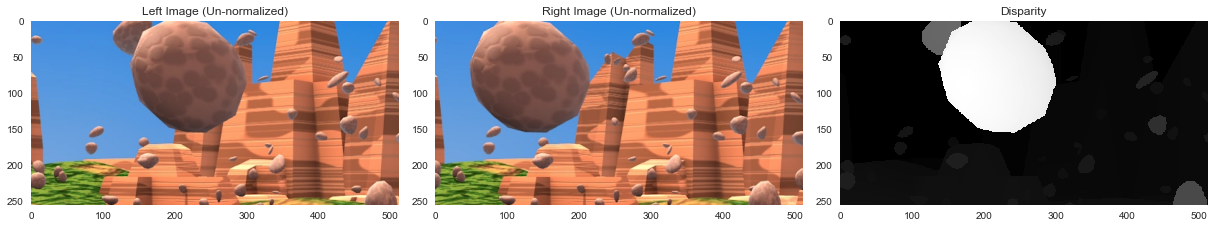

In [9]:
monkaa_dataset = d_utils.MonkaaDataset(monkaa_path, transforms=pretrain_transforms)
_ = d_utils.imshow_samples_and_print_information(monkaa_dataset, unnormalize=True)

### Flyingthings3d Dataset

Size of the Flyingthings 3D Dataset: 26760
Left/Right image shapes: torch.Size([3, 256, 512])
Disparity shape: torch.Size([1, 256, 512])



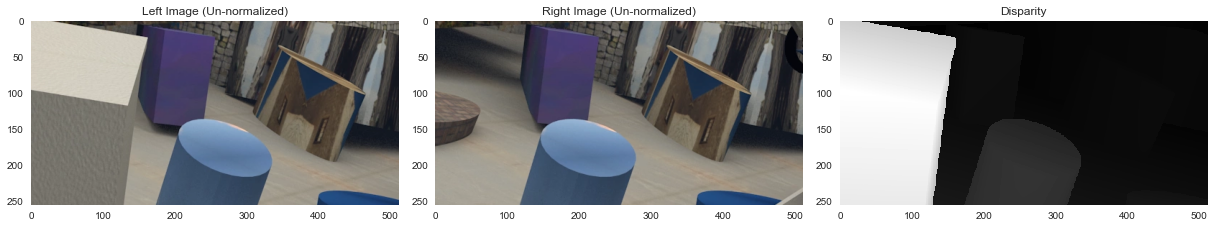

In [10]:
flyingthings3d_dataset = d_utils.Flyingthings3dDataset(flyingthings3d_path, transforms=pretrain_transforms)
_ = d_utils.imshow_samples_and_print_information(flyingthings3d_dataset, unnormalize=True)

### Kitti Dataset

Size of the Kitti 2015 Dataset Training+Validation: 150
Left/Right image shapes: torch.Size([3, 256, 512])
Disparity shape: torch.Size([1, 256, 512])

Size of the Kitti 2015 Dataset Evaluation: 50
Left/Right image shapes: torch.Size([3, 352, 1216])
Disparity shape: torch.Size([1, 352, 1216])



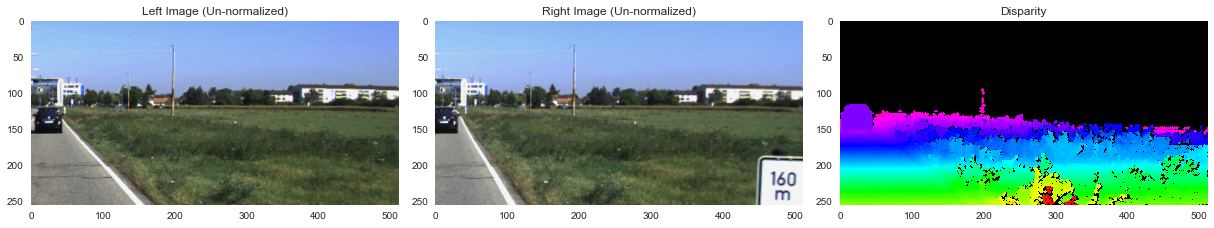

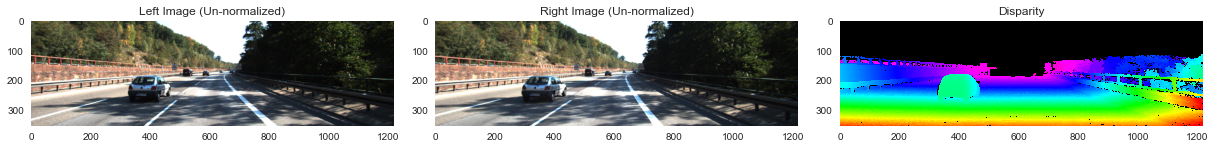

In [11]:
kitti_train_val, kitti_eval = d_utils.KittiDataset(kitti_path, train_transforms=finetune_transforms, eval_transforms=eval_transforms).split_dataset()

_ = d_utils.imshow_samples_and_print_information(kitti_train_val, unnormalize=True, rainbow=True)
_ = d_utils.imshow_samples_and_print_information(kitti_eval, unnormalize=True, rainbow=True)

### Split/Concat Datasets

We splitted Scene Flow 95% for training and 5% for validation. For Kitti we splitted 150 samples for training/validation and 50 samples for testing, then splitted 150 samples as 80% for training and 20% for validation.

In [12]:
train1, val1 = d_utils.split_dataset(driving_dataset, first_part=0.95, second_part=0.05)
train2, val2 = d_utils.split_dataset(monkaa_dataset, first_part=0.95, second_part=0.05)
train3, val3 = d_utils.split_dataset(flyingthings3d_dataset, first_part=0.95, second_part=0.05)

finetuning_train_dataset, finetuning_val_dataset = d_utils.split_dataset(kitti_train_val, 
                                                                         first_part=0.8, 
                                                                         second_part=0.2)

pretraining_train_dataset = torch.utils.data.ConcatDataset((train1, train2, train3))
pretraining_val_dataset = torch.utils.data.ConcatDataset((val1, val2, val3))

print("Size of the finetuning_train_dataset:", len(finetuning_train_dataset))
print("Size of the finetuning_val_dataset:", len(finetuning_val_dataset))
print("Size of the pretraining_train_dataset:", len(pretraining_train_dataset))
print("Size of the pretraining_val_dataset:", len(pretraining_val_dataset))

Size of the finetuning_train_dataset: 120
Size of the finetuning_val_dataset: 30
Size of the pretraining_train_dataset: 35172
Size of the pretraining_val_dataset: 1852


## Dataloader

For training higher batch sizes can be set. Since test images are larger than training images we recommend using small batch sizes.

In [13]:
train_batch_size = 1
eval_batch_size = 1

finetuning_train_dataloader = d_utils.make_dataloader(finetuning_train_dataset, batch_size=train_batch_size)
finetuning_val_dataloader = d_utils.make_dataloader(finetuning_val_dataset, batch_size=eval_batch_size)
pretraining_train_dataloader = d_utils.make_dataloader(pretraining_train_dataset, batch_size=train_batch_size)
pretraining_val_dataloader = d_utils.make_dataloader(pretraining_val_dataset, batch_size=eval_batch_size)
test_dataloader = d_utils.make_dataloader(kitti_eval, batch_size=1, shuffle=False)

## Training Device

In [14]:
device = t_utils.get_device()
print(f"Device is : {device}")
print(torch.cuda.get_device_name(torch.cuda.current_device()))

Device is : cuda
NVIDIA GeForce RTX 3080 Laptop GPU


## Experiments

<div class="alert alert-warning">
We created <code>all_experiments.ipynb</code> (and <code>all_experiments.html</code>) to keep this report clean. We show some code examples here to give insight about how we done our experiments systematically below. Also all experiments includes <code>CELL.txt</code> showing how the experiment was done.
</div>

### Code Examples

**For Pretraining:**

Trains GCnet with 192 max disparity for 10 epoch on pretraining dataset.

```python
model = GCnet(192).to(device)
e1 = t_utils.Experiment(name         = "GCnet-pretraining", 
                        description  = "Pretraining GCnet with maxdisp=192 for 10 epochs",
                        model        = model,
                        criterion    = nn.SmoothL1Loss(), 
                        scheduler    = None,
                        optimizer    = torch.optim.Adam(model.parameters(), lr=1e-4), 
                        train_loader = pretraining_train_dataloader, 
                        val_loader   = pretraining_val_dataloader, 
                        max_iter     = len(pretraining_train_dataset)*10,
                        val_interval = 2500,
                        vis_interval = 500,
                        save_interval= 5000,
                        device       = device)
e1.train_model()
e1.save()

```

**For Finetuning:**

Loads pretrained PSMNet model and finetunes for 20000 iterations.

```python
checkpoint = torch.load("runs/PSM-pretraining-2021_09_22-08_31_27_192disp_10epoch_default/model_manual_save.pt")
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])

e1 = t_utils.Experiment(name         = "PSM-finetuning", 
                        description  = "Finetuning PSMNet with maxdisp=192 with lr=1e-5 on Pretrained model with 10 epochs.",
                        model        = model,
                        criterion    = nn.SmoothL1Loss(), 
                        scheduler    = None,
                        optimizer    = torch.optim.Adam(model.parameters(), lr=1e-5), 
                        train_loader = finetuning_train_dataloader, 
                        val_loader   = finetuning_val_dataloader, 
                        max_iter     = 20000,
                        val_interval = 200,
                        vis_interval = 100,
                        save_interval= 500,
                        device       = device)
e1.train_model()
e1.save()

```

**To Continue an Experiment:**

We made it easy to interrupt and continue the training later. `name`, `description`, etc. parameters are loaded automatically.

```python
model = PSMNet(192).to(device)
e1 = t_utils.Experiment(model        = model,
                        criterion    = nn.SmoothL1Loss(), 
                        scheduler    = None,
                        optimizer    = torch.optim.Adam(model.parameters(), lr=1e-4), 
                        train_loader = finetuning_train_dataloader, 
                        val_loader   = finetuning_val_dataloader, 
                        device       = device)
e1.load("runs/PSM-finetuning-2021_09_25-01_29_49_20000iter_lr1e-4/model_manual_save.pt")
e1.train_model()
e1.save()

```

**To Continue an Experiment More:**

Experiment parameters can be modified after loading.

```python
e1.max_iter = 30000
e1.train_model()
e1.save()
```

## Outputs

In [15]:
best_psmnet_sched_path = "runs/PSM-finetuning-2021_09_26-18_02_34_scheduler_lr1e-4/model_manual_save.pt"
best_psmnet_path = "runs/PSM-finetuning-2021_09_25-01_29_49_20000iter_lr1e-4/model_manual_save.pt"
best_gcnet_path = "runs/GCnet-finetuning-2021_09_27-19_30_42_lr1e-4/model_manual_save.pt"

### Full-PSMNet (finetuned with Scheduler) Outputs

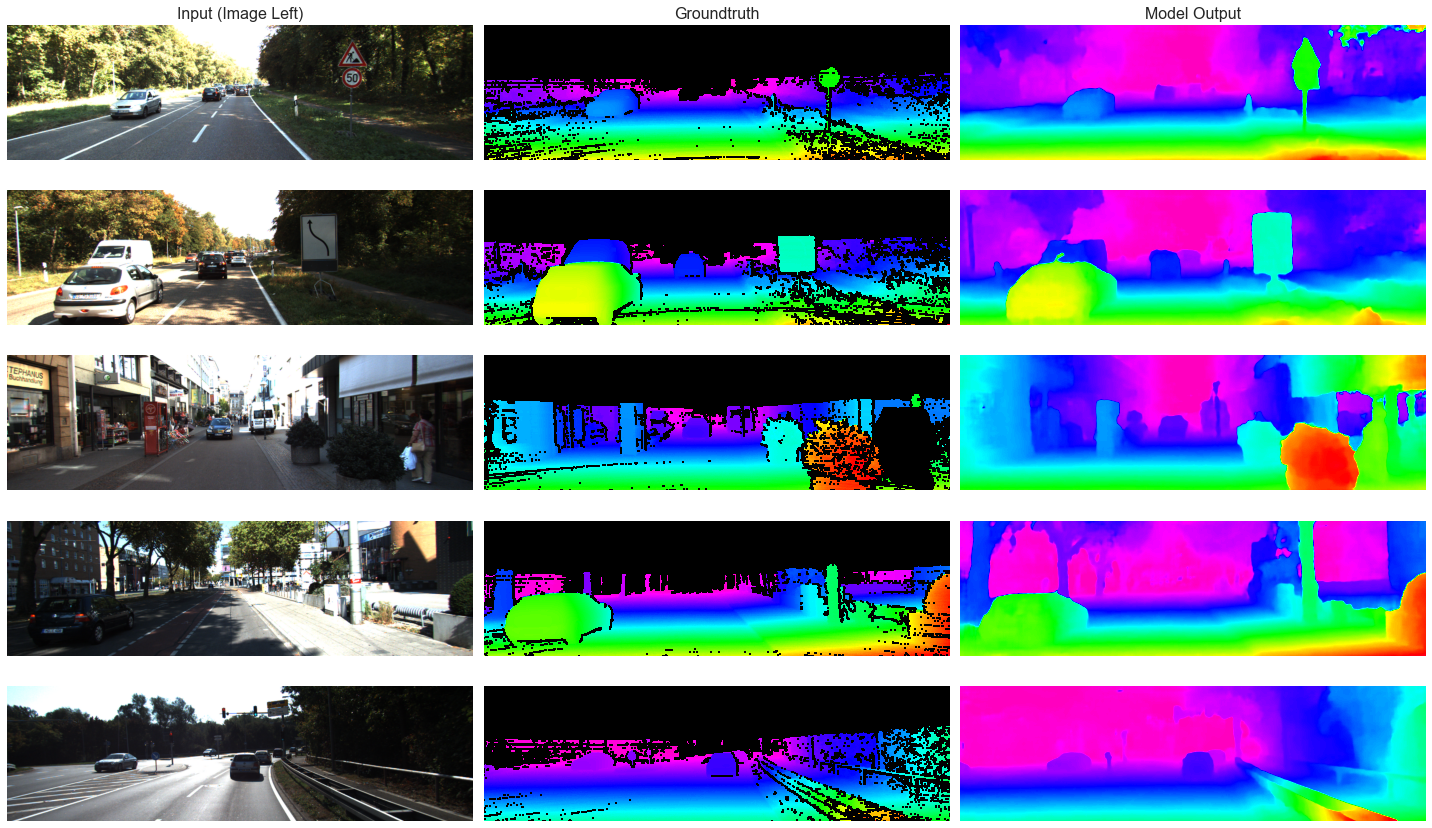

In [16]:
checkpoint = torch.load(best_psmnet_sched_path)
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])
t_utils.show_model_outputs(model, test_dataloader, device, count=5, save_path="plots/fullpsmnet-outputs.svg") 

### GCNet Outputs

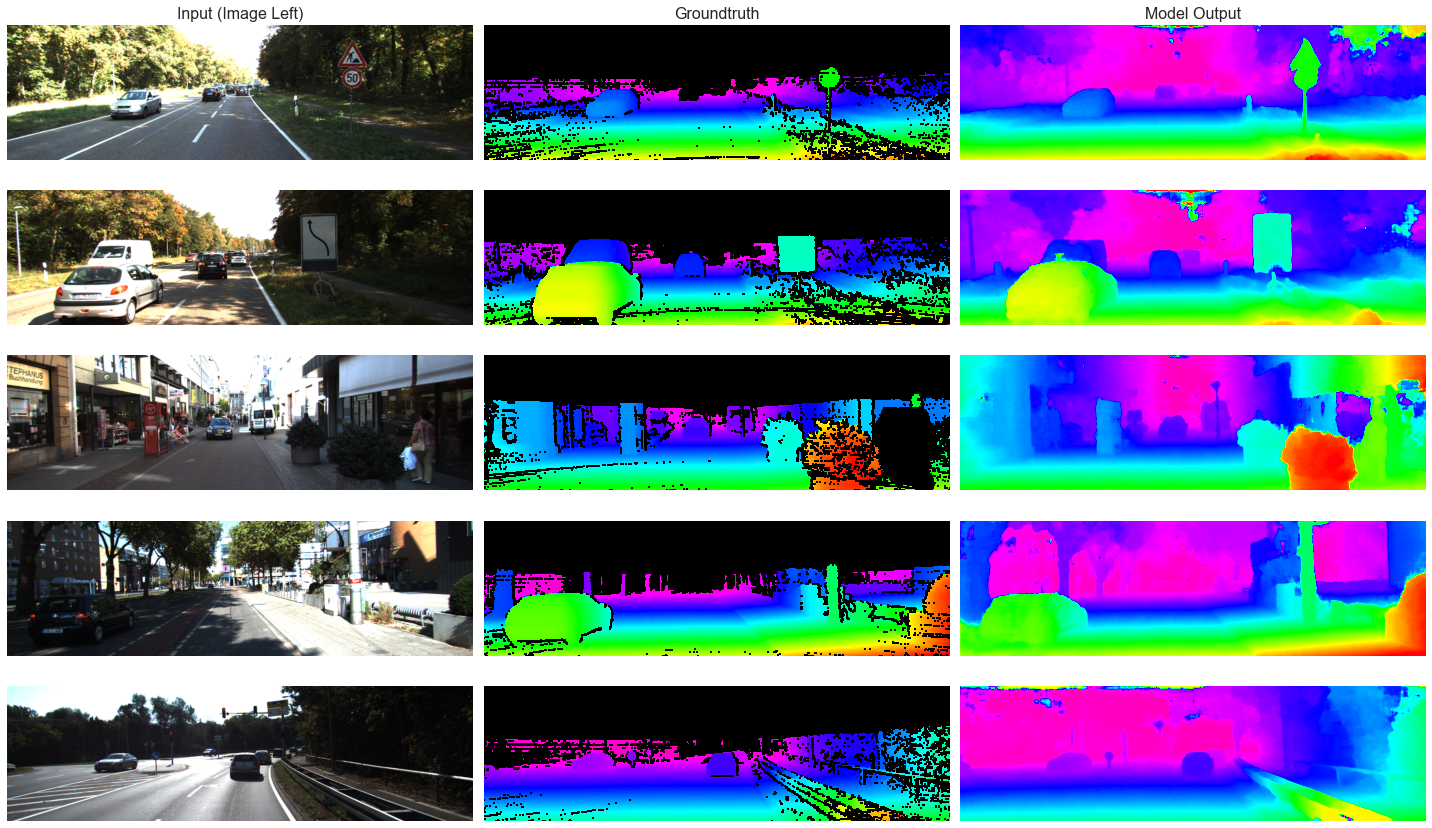

In [17]:
checkpoint = torch.load(best_gcnet_path)
model = GCnet(192).to(device)
model.load_state_dict(checkpoint['model'])
t_utils.show_model_outputs(model, test_dataloader, device, count=5, save_path="plots/gcnet-outputs.svg")

### Compare Full-PSMNet & GCNet

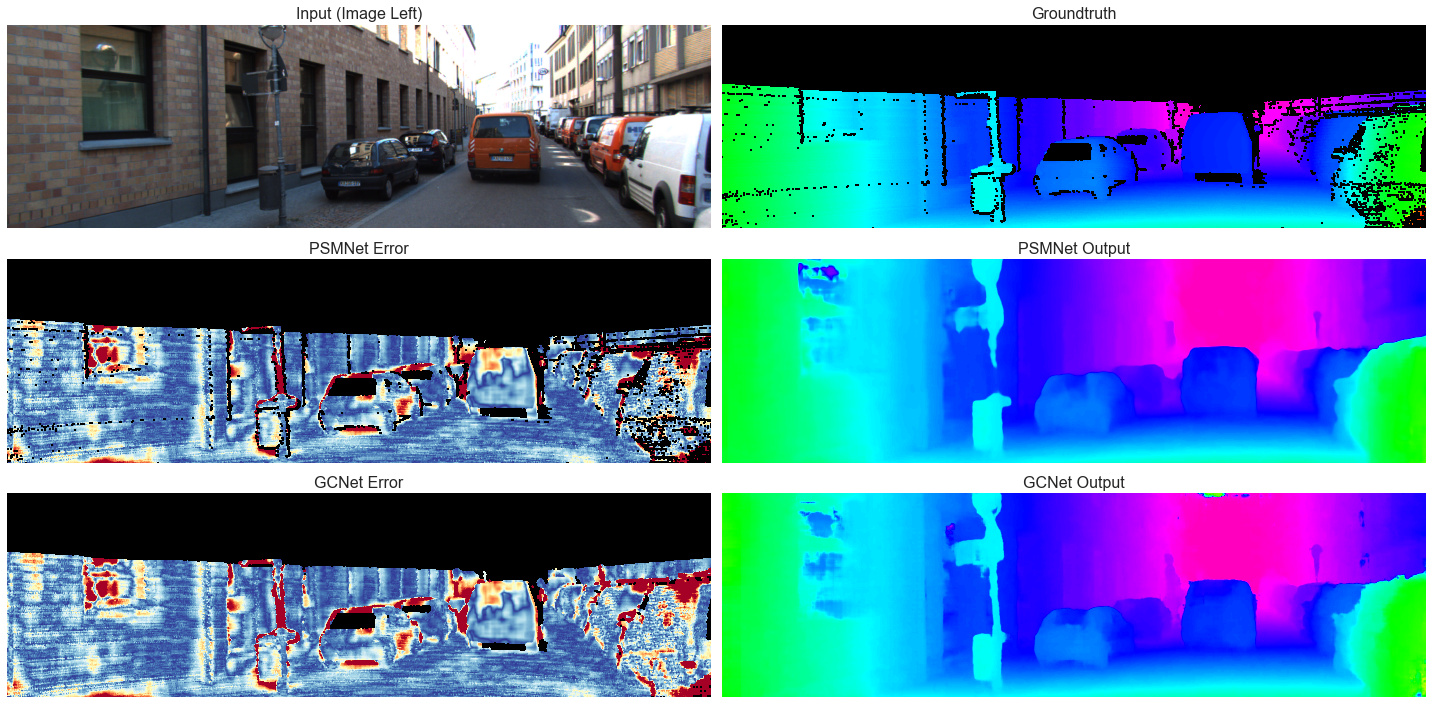

In [18]:
checkpoint = torch.load(best_psmnet_sched_path)
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])

checkpoint = torch.load(best_gcnet_path)
model2 = GCnet(192).to(device)
model2.load_state_dict(checkpoint['model'])

t_utils.show_compare_model_error(model, model2, "PSMNet", "GCNet", test_dataloader, device, idx=15, save_path="plots/compare/psmnet_vs_gcnet.svg") 

### Compare Scheduler Effect of Full-PSMNet

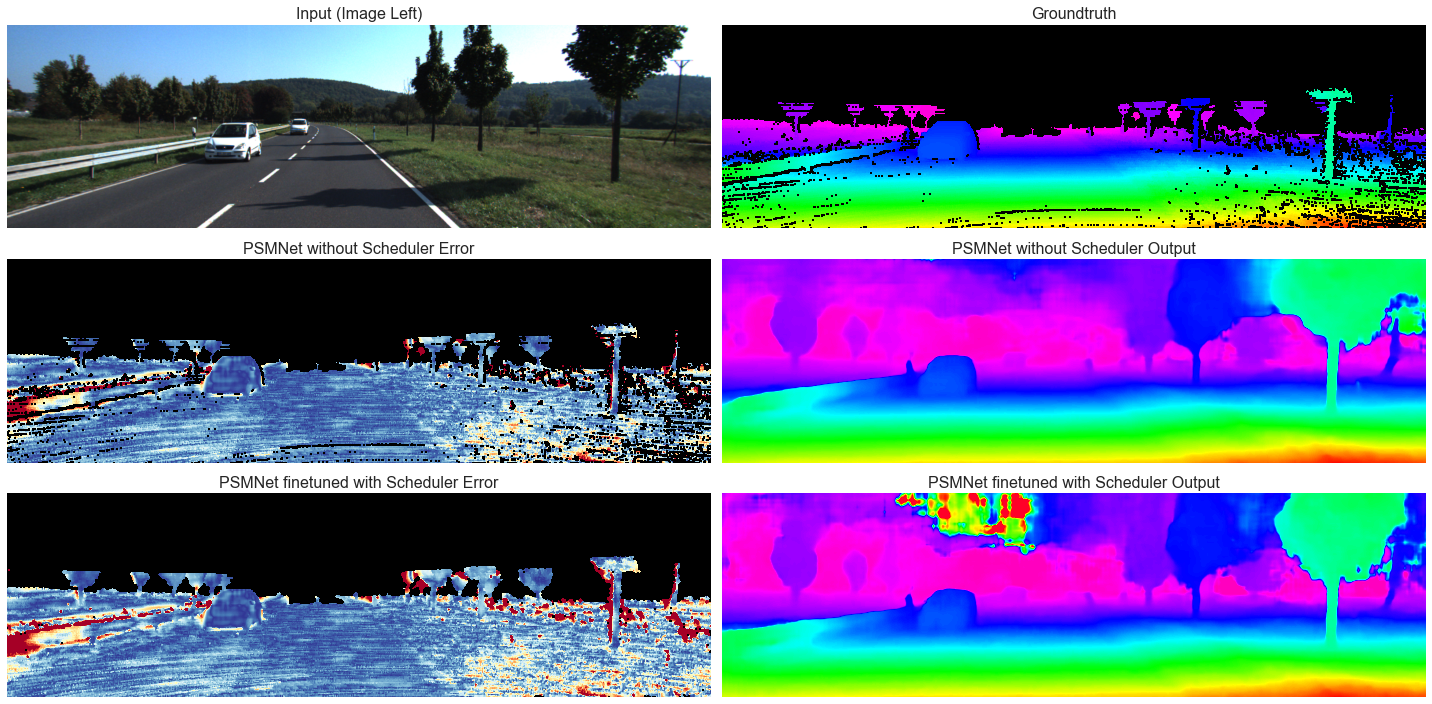

In [19]:
checkpoint = torch.load(best_psmnet_path)
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])

checkpoint = torch.load(best_psmnet_sched_path)
model2 = PSMNet(192).to(device)
model2.load_state_dict(checkpoint['model'])

t_utils.show_compare_model_error(model, model2, "PSMNet without Scheduler", "PSMNet finetuned with Scheduler", test_dataloader, device, idx=30, save_path="plots/compare/scheduler_effect.svg")

## Training, Validation, Test Statistics

<div class="alert alert-warning">
All evaluation statistics can be found in <code>all_experiments.ipynb</code> (and <code>all_experiments.html</code>). We seperated other experiments to keep this report clean.
</div>

<div class="alert alert-warning">
Training/validation statistics and model outputs can be seen with Tensorboard. Try running Tensorboard with modified parameters like this: <code>tensorboard --samples_per_plugin="scalar=10000,images=200" --logdir runs/</code>
</div>

![image alt](imgs/tensorboard_1.png)

![image alt](imgs/tensorboard_2.png)

### (BEST) Full-PSMNet finetuned with Scheduler

In [20]:
checkpoint = torch.load(best_psmnet_sched_path)
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])
t_utils.evaluate_model(model, test_dataloader, device, nn.SmoothL1Loss())
#t_utils.show_model_error(model, test_dataloader, device, count=10, save_path="plots/full-psmnet")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.42it/s]

mean 3PE: 3.16%
mean Loss:  0.5472


### Full-PSMNet finetuned without Scheduler

In [21]:
checkpoint = torch.load(best_psmnet_path)
model = PSMNet(192).to(device)
model.load_state_dict(checkpoint['model'])
t_utils.evaluate_model(model, test_dataloader, device, nn.SmoothL1Loss())

100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.42it/s]

mean 3PE: 3.24%
mean Loss:  0.5654


### GCNet

In [22]:
checkpoint = torch.load(best_gcnet_path)
model = GCnet(192).to(device)
model.load_state_dict(checkpoint['model'])
t_utils.evaluate_model(model, test_dataloader, device, nn.SmoothL1Loss())
#t_utils.show_model_error(model, test_dataloader, device, count=10, save_path="plots/gcnet")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:32<00:00,  1.54it/s]

mean 3PE: 4.41%
mean Loss:  0.7358


## References

- https://github.com/pytorch/vision/blob/7947fc8fb38b1d3a2aca03f22a2e6a3caa63f2a0/torchvision/models/resnet.py#L37  
- https://github.com/zyf12389/GC-Net/blob/baf187b17c3585bd5a23d7bbe8ea5f29e885c09b/gc_net.py  
- https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#sphx-glr-auto-examples-plot-visualization-utils-py  
- https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html  
- https://pytorch.org/docs/stable/tensorboard.html  
- https://github.com/JiaRenChang/PSMNet/blob/master/main.py